In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import nltk

In [22]:
# Read in data
df = pd.read_csv('input/Reviews.csv')
df = df.head(2000)

In [23]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

<Axes: title={'center': 'Count of Reviews'}, xlabel='Score'>

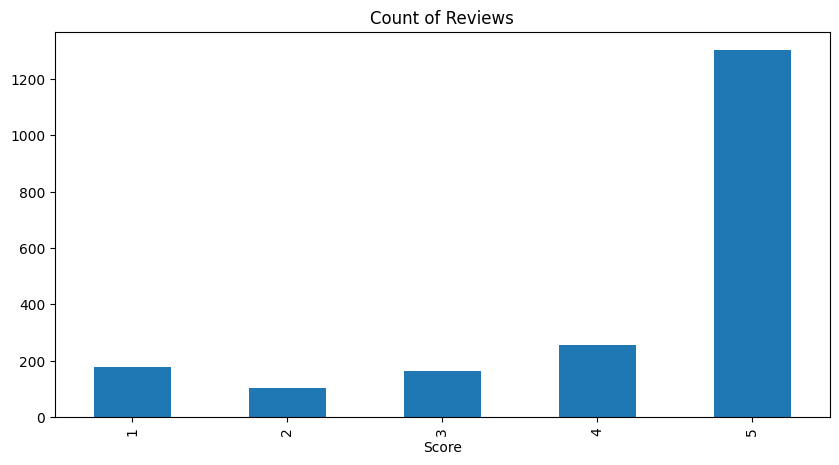

In [24]:
df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews', figsize=(10,5))

In [25]:
example = df['Text'][1045]

In [26]:
tok = nltk.word_tokenize(example)

In [27]:
tagged = nltk.pos_tag(tok)[:10]

In [28]:
entity = nltk.chunk.ne_chunk(tagged)
entity.pprint()

(S
  i/NN
  bought/VBD
  the/DT
  liter/NN
  size/NN
  bottles/NNS
  of/IN
  this/DT
  dressing/VBG
  on/IN)


In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [30]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.8858}

In [31]:
df['Score'][1045]

3

In [32]:
# run the polarity score on entire DF
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/2000 [00:00<?, ?it/s]

In [35]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})

In [36]:
final = pd.merge(df, vaders, how='left')

In [37]:
final

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,B001E5E29A,A3IJNH61DY5N9K,Sharon Allan,10,11,5,1265846400,Great Waffles for us non-cooks,I have to laugh at the reviews that said it wa...,0.000,0.754,0.246,0.9744
1996,1997,B001E5E29A,A35W3JQYP0M655,"Ambergris ""John Thomas""",7,7,5,1279929600,Excellent Fluffy Pancakes.....,I had read some favorable reviews of this panc...,0.025,0.744,0.231,0.9978
1997,1998,B001E5E29A,A3CLWZGMC7M9Z1,"Hippie2MARS ""Hippie2MARS""",6,6,4,1250640000,Good Basic Mix,I was expecting great things based on the revi...,0.000,0.719,0.281,0.9501
1998,1999,B001E5E29A,A2V6P1FKRHCVQQ,S. Jackson,8,9,4,1265760000,"Good pancakes, lots of work",I love this pancake mix. I bought my first ca...,0.053,0.839,0.108,0.7003


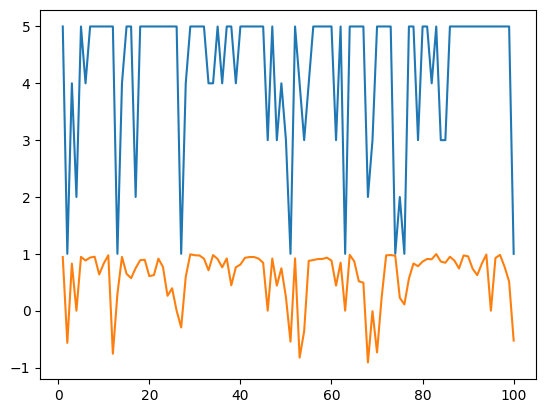

In [43]:
f = final.head(100)

plt.plot(f['Id'], f['Score'])
plt.plot(f['Id'], f['compound'])


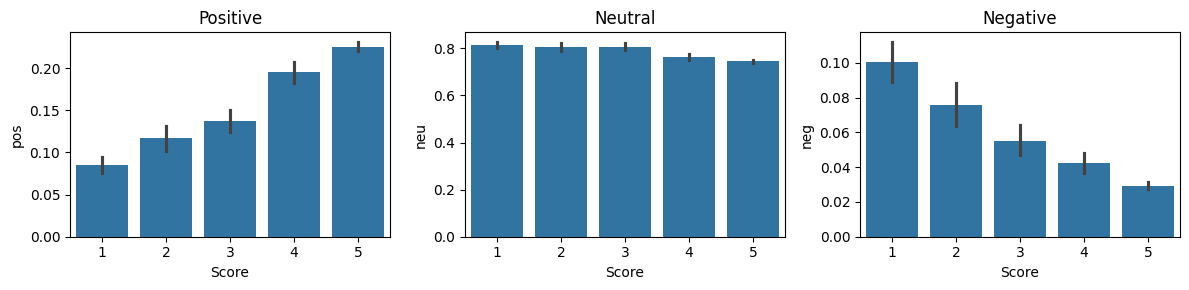

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=final, x='Score', y='pos', ax=axs[0])
sns.barplot(data=final, x='Score', y='neu', ax=axs[1])
sns.barplot(data=final, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()